## 1.导入包

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

## 2.读取文件

In [2]:
store_df = pd.read_csv("F:/学习/数学建模/Rossmann Store/store.csv")
train_df = pd.read_csv("F:/学习/数学建模/Rossmann Store/train.csv")           
test_df = pd.read_csv("F:/学习/数学建模/Rossmann Store/test.csv")
submission_df = pd.read_csv("F:/学习/数学建模/Rossmann Store/sample_submission.csv")

D:\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3.数据展示

In [3]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## 4.数据合并

In [6]:
##通过分析数据可知，商店的详细信息在store_df中，需要将商店的详细信息根据商店的编号与训练集和测试集合并，以增加训练集和测试集的特征
## Store 为商店编号，向左合并
merge_train_df = train_df.merge(store_df, how="left",on="Store")
merge_test_df = test_df.merge(store_df, how="left",on="Store")

In [7]:
merge_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## 5.数据预处理

In [8]:
merge_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### 5.1 提取时间信息

In [9]:
def extract_time(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df["Date"].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

In [10]:
extract_time(merge_train_df)
extract_time(merge_test_df)

In [11]:
merge_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [12]:
#删除训练集中商店关门的日子
merge_train_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [13]:
merge_train_df = merge_train_df[merge_train_df['Open']==1].copy()

In [14]:
merge_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

### 5.2缺失值处理

- 首先分析 CompetitionOpenSinceMonth 和 CompetitionOpenSinceYear 这两列数据，这两列的含义是出现竞争店铺的年份和月份，存在缺失值的原因是该商店附近不存在竞争店铺，可以用 0 填补。
- 其次可以通过上一步求得的年份和月份创建一列新数据来展示竞争者出现了多久

In [15]:
def cal_during_compitition(df):
    df["CompetitionOpen"] = 12*(df['Year']-df['CompetitionOpenSinceYear'])+(df['Month']-df['CompetitionOpenSinceMonth'])
    df["CompetitionOpen"] = df["CompetitionOpen"].apply(lambda x:0 if x<0 else x).fillna(0)                                          

In [16]:
cal_during_compitition(merge_train_df)
cal_during_compitition(merge_test_df)

In [17]:
merge_train_df[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionOpen']]

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionOpen
0,9.0,2008.0,82.0
1,11.0,2007.0,92.0
2,12.0,2006.0,103.0
3,9.0,2009.0,70.0
4,4.0,2015.0,3.0
...,...,...,...
1016776,9.0,2006.0,76.0
1016827,10.0,1999.0,159.0
1016863,NaN,NaN,0.0
1017042,NaN,NaN,0.0


- 接下来分析 Promo2，Promo2SinceWeek，Promo2SinceYear，PromoInterval 这四列数据
 - Promo2表示该店铺是否有促销：0表示从未参加过促销，1表示参加过促销
 - Promo2SinceWeek/Promo2SinceYear表示该店铺 ××年、第×周开始参加促销
 - PromoInterval表示该店铺促销的时间间隔： "Feb,May,Aug,Nov"表示该店铺每年的1月，5月，8月，11月开始搞促销
- 然后就可以创建两列数据分别表示促销开始了多久，当前的月份是否有搞促销

In [18]:
def check_promo_month(row):#检查当前月份是否有搞促销
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if(row['Promo2Open'] and month2str[row['Month']] in months):
            return 1
        else:
            return 0
    except:
        return 0
    
def cal_during_promo(data): #计算促销持续了几个月
    data['Promo2Open'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek)*7/30.5
    data['Promo2Open'] = data['Promo2Open'].apply(lambda x: 0 if x < 0 else x).fillna(0)*data['Promo2']#only when there is promo
    #创建新列表示当前月份是否有搞促销
    data['IsPromo2Month'] = data.apply(check_promo_month, axis=1) * data['Promo2']

In [19]:
cal_during_promo(merge_train_df)
cal_during_promo(merge_test_df)

In [20]:
merge_train_df[['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval','Promo2Open','IsPromo2Month']]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Open,IsPromo2Month
0,0,NaN,NaN,NaN,0.000000,0
1,1,13.0,2010.0,"Jan,Apr,Jul,Oct",64.131148,1
2,1,14.0,2011.0,"Jan,Apr,Jul,Oct",51.901639,1
3,0,NaN,NaN,NaN,0.000000,0
4,0,NaN,NaN,NaN,0.000000,0
...,...,...,...,...,...,...
1016776,0,NaN,NaN,NaN,0.000000,0
1016827,0,NaN,NaN,NaN,0.000000,0
1016863,1,48.0,2012.0,"Jan,Apr,Jul,Oct",1.213115,1
1017042,0,NaN,NaN,NaN,0.000000,0


## 6.特征提取

In [21]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [22]:
merge_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

In [23]:
train_inputs = merge_train_df[input_cols].copy()
targets = merge_train_df[target_col].copy()
test_inputs = merge_test_df[input_cols].copy()

In [24]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Promo                844392 non-null  int64  
 3   StateHoliday         844392 non-null  object 
 4   SchoolHoliday        844392 non-null  int64  
 5   StoreType            844392 non-null  object 
 6   Assortment           844392 non-null  object 
 7   CompetitionDistance  842206 non-null  float64
 8   CompetitionOpen      844392 non-null  float64
 9   Day                  844392 non-null  int64  
 10  Month                844392 non-null  int64  
 11  Year                 844392 non-null  int64  
 12  WeekOfYear           844392 non-null  UInt32 
 13  Promo2               844392 non-null  int64  
 14  Promo2Open           844392 non-null  float64
 15  IsPromo2Month   

In [25]:
##划分数值特征和分类特征
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']

In [26]:
train_inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [27]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

- 采用最大距离插补缺失距离

In [28]:
max_distance = train_inputs.CompetitionDistance.max()
train_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

- 归一化

In [29]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [30]:
test_inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

- 独热编码

In [31]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].astype('str')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
# train_inputs[categorical_cols].info()

In [32]:
X = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## 7.XGBoost回归

In [33]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [34]:
%%time
model.fit(X, targets)

Wall time: 3.61 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
preds = model.predict(X)

In [36]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
rmse(preds, targets)

2436.070232904147

- 特征重要性

In [37]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
1,Promo,0.291977
17,StoreType_b,0.103151
5,Promo2,0.096431
20,Assortment_a,0.058846
3,CompetitionDistance,0.051998
22,Assortment_c,0.049951
0,Store,0.044921
8,Day,0.039690
9,Month,0.036663
19,StoreType_d,0.036597


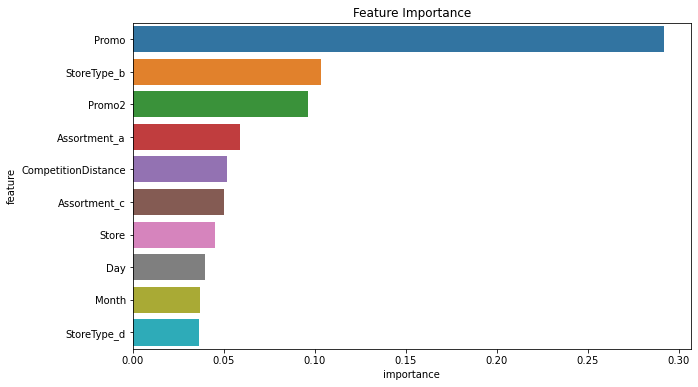

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

- k折叠交叉验证

In [39]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [40]:
kfold = KFold(n_splits=5)

In [41]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2414.7936312858537, Validation RMSE: 2467.171620065982
Train RMSE: 2404.0534016734114, Validation RMSE: 2441.6522708946354
Train RMSE: 2422.521349581155, Validation RMSE: 2403.6346008232986
Train RMSE: 2356.396019856885, Validation RMSE: 2465.678539017347
Train RMSE: 2413.4193964653396, Validation RMSE: 2479.248192000345


In [42]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [43]:
preds = predict_avg(models, X_train)
preds

array([8144.918 , 7517.7554, 8913.873 , ..., 8067.2563, 9229.947 ,
       8738.672 ], dtype=float32)

- 超参数调整和正则化

In [44]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [45]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [46]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [47]:
test_params(n_estimators=10)

Train RMSE: 2412.206862830845, Validation RMSE: 2428.2967201925658


In [48]:
test_params(max_depth=2)

Train RMSE: 2416.2372927698643, Validation RMSE: 2429.450532771219


In [49]:
test_params(max_depth=5)

Train RMSE: 1503.4743795063553, Validation RMSE: 1518.1417137048907


In [50]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5050.9249946985965, Validation RMSE: 5056.824977594182


In [51]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2203.568029826842, Validation RMSE: 2222.8839609391002


In [52]:
test_params(booster='gblinear')

In [69]:
test_params(n_estimators=1000, learning_rate=0.2, max_depth=10, subsample=0.9, colsample_bytree=0.7)

Train RMSE: 2369.130317834184, Validation RMSE: 3369.7144918390945


In [68]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [54]:
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
test_preds = model.predict(X_test)

In [56]:
submission_df['Sales']  = test_preds

In [57]:
test_df.Open.isna().sum()

11

In [58]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [59]:
submission_df

,Id,Sales
0,1,4341.630859
1,2,8693.640625
2,3,9301.455078
3,4,6786.824219
4,5,6893.714844
...,...,...
41083,41084,3420.328369
41084,41085,7441.502441
41085,41086,7421.017090
41086,41087,23765.673828


## 8.神经网络集成学习

In [60]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchensemble import GradientBoostingRegressor,BaggingRegressor,FusionRegressor,VotingRegressor,SnapshotEnsembleRegressor

In [61]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(23, 128)
        self.linear2 = nn.Linear(128, 128)
        self.linear3 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.view(x.size()[0], -1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [62]:
class ensemble_model():
    def __init__(self,ensemble,network,estimators=10,lr=1e-3,weight_decay=5e-4,epoch=50,use_cuda=False):
        super(ensemble_model, self).__init__()
        self.epoch=epoch
        self.model=ensemble(
                        estimator=network,
                        n_estimators=10,cuda=use_cuda)
        #设置优化器optimizer
        self.model.set_optimizer("Adam", lr=lr, weight_decay=weight_decay)
    def fit(self,X_train,Y_train):
        X_train=torch.FloatTensor(np.array(X_train))
        Y_train=torch.FloatTensor(np.array(Y_train)).reshape(-1,1)
        # Tensor -> Data loader
        train_data = TensorDataset(X_train, Y_train)
        train_loader = DataLoader(train_data, batch_size=100, shuffle=True)  
        self.model.fit(train_loader, epochs=self.epoch)
    def predict(self,X_test):
        X_test=torch.FloatTensor(np.array(X_test))
        # 预测
        Y_pred = self.model.predict(X_test)
        return np.array(Y_pred)
    def score(self,X_test,Y_test):
        X_test = torch.FloatTensor(np.array(X_test))
        Y_test = torch.FloatTensor(np.array(Y_test)).reshape(-1, 1)
        test_data = TensorDataset(X_test, Y_test)
        test_loader = DataLoader(test_data, batch_size=10, shuffle=False)
        testing_mse = self.model.evaluate(test_loader)
        return testing_mse

In [63]:
mlp_model=ensemble_model(GradientBoostingRegressor,MLP,epoch=100)

In [64]:
X.shape

(844392, 23)

In [65]:
targets.shape

(844392,)

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, targets, test_size = 0.1)
mlp_model.fit(X_train,Y_train)
Y_pred=mlp_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
from  sklearn.metrics import r2_score
train_r2=r2_score( Y_train,mlp_model.predict(X_train))
test_r2=r2_score( Y_test,Y_pred)
print(f"神经网梯度提升集成学习 , MSE:{mse},mae:{mae},train_r2:{train_r2},test_r2:{test_r2}")

神经网梯度提升集成学习 , MSE:1178782.559139635,mae:775.1471195999563,train_r2:0.8879223618521294,test_r2:0.8774864421275211


In [67]:
import sklearn